# Alberqisque, PY 03270

This is originally a FLIQ submission, authored by Abdullah, Jayesh, and Mack. Is a Jupyter-based educational game intended to familiarize the player to various quantum algorithms, with classical counterparts. The game is designed to be played in a Jupyter notebook, and it is intended for use in a classroom setting. The game is based on the concept of a "quantum computer" and its ability to solve problems that are intractable for classical computers. The game is designed to be played by students who are familiar with the basics of quantum computing, and it is intended to be used as a teaching tool.

Additionally, you will also learn how to use the Conda environment manager, and Jupyterlab, allowing you to switch between Python versions and run Python on an interactive environment.

## Plot

John Doe, a salesman at the quint Qiskit County of Pythonidae, has to solve an intractable problem. He has to find the best route to visit all the customers in his territory, which is represented as a graph. The graph is defined by a set of vertices (customers) and edges (roads). The residents of this county is concerned about the failing infrastructure of the roads, and they want to know if the roads are still in good condition. John has to find the best route to visit all the customers, while also taking into account the condition of the roads. He can only visit each customer once, and he has to return to his starting point. 

Sincerely,

Xixa Starova ✨ 🇦🇱

## Chapter 0: Qiskit, Jupyter, and Hello World

Before we start our journey, we need to know about the specialty of Qiskit, the main export of Alberqisque. Designed by IBM, Qiskit is a premier quantum computing framework allowing developers and researchers to quickly design quantum and hybrid quantum-classical circuits in Python. The main components of Qiskit is its software development kit (supplying the circuit library and transpilers), and the runtime environment (which supplies methods for running a quantum circuit on either a simulator or a real machine).

There are many related open-source projects that use the "Qiskit" name, but are not part of Qiskit itself; rather, they interface with Qiskit to provide valuable second-order functionality. Qiskit Aer is one such package that interfaces with Qiskit, providing quantum computing simulators with realistic noise models; moreover it is also maintained by IBM Quantum.

We also need to be acquainted with Jupyter, which allows you to interactively run Python code in a code editor (such as Visual Studio Code), and related mathematical libraries. To run Jupyter on Visual Studio Code, you need to install the `ipykernel` package.

### Prerequisites

* A _Tier 1_ platform
    * 64-bit Windows 10 or 11
    * MacOS
    * Linux x86_64, ARM64, or AArch64
* Python 3.12 (Python 3.13 is currently incompatible)
* Optionally, a virtual environment
    * Vanilla .venv
    * Conda

### 0.1: Installing Qiskit

We will run Qiskit using Python. Recently, Qiskit is also a C framework. Qiskit is compatible with Python 3.12 (but not Python 3.13 at the time of writing). It is recommended to use Conda to create a virtual environment, and then use the Conda Forge channel to install the Qiskit modules. This allows easy switching between Python versions to ensure that you are using the compatible version of Python.

The SDK is simply named the `qiskit` package. The runtime is named the `qiskit-ibm-runtime` package. We will also use the `qiskit-aer` if necessary, as this related package is required for using simulators (the easy mode) of the game.

```bash
$ conda create -n qiskit2 python=3.12
$ conda activate qiskit2
```

If so, you can install Qiskit using the Conda Forge channel instead of pip:

```bash
$ conda install conda-forge::qiskit
$ conda install conda-forge::qiskit conda-forge::qiskit-ibm-runtime conda-forge::qiskit-aer
$ conda install conda-forge::jupyterlab conda-forge::ipykernel
```

We will also install auxiliary packages that are used for visualizating and adding further interactivity to the notebook.

```bash
$ conda install conda-forge::numpy conda-forge::matplotlib conda-forge::pylatexenc
```

However, there is one incompatibility that can be ersolved by force-reinstalling the `sqlite` package. Otherwise, you will see that `sqlite3_deserialize` is an undefined symbol in some `.so` file.

```bash
$ conda install conda-forge::libsqlite --force-reinstall
$ conda install conda-forge::sqlite --force-reinstall
```

### 0.2: Importing Qiskit packages

The mayor of Alberqisque, David Hamilton Israel, will introduce you to two facets of this quest: namely quantum computing, and the Qiskit platform. Israel will teach you how to build, display, and run the circuit using the `qiskit`, `qiskit-ibm-runtime`, and `qiskit-aer` packages. Each package has many subpackages; please explicitly list them when you need to use them.

If the first cell fails, it usually means that the packages are not installed, or that you are using an incompatible version of Python. Israel has already provided two lines that might fix the problem, by running `conda install conda-forge::libsqlite conda-forge::sqlite --force-reinstall`.

Auxiliary packages not involved with the actual quantum operations, such as MatPlotLib and PyGame will also be imported to visualize and animate the process and outputs of a quantum computation.

In [99]:
# qiskit (SDK) packages
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

# qiskit-ibm-runtime (RE) packages
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler

# qiskit-aer packages
from qiskit_aer import AerSimulator
from qiskit_aer import AerError

# Auxiliary packages
import matplotlib
import pylatexenc

# Test out if appropriate packages are used
(QuantumCircuit, Estimator, matplotlib)

(qiskit.circuit.quantumcircuit.QuantumCircuit,
 qiskit_ibm_runtime.estimator.EstimatorV2,
 <module 'matplotlib' from '/home/samaria/miniconda3/envs/qiskit2/lib/python3.12/site-packages/matplotlib/__init__.py'>)

### 0.3: Hello World

Israel will demonstrate how to build a simple quantum circuit, and how to express that in mathematical language. 

__Linear algebra__ and __probability theory__ is a prerequisite for the readiness of that subject, but you can easily pick up these skills by envisioning these topics from real life experience. 

In particular, a __vector__ can be seen as a direction, a point in Cartesian space, or an ordered tuple; a __matrix__ can be seen as the relationship between pairs of inputs and outputs; finally, __matrix multiplication__ can be seen as producing output entries simply from multiples of input entries as described by the matrix in parallel. The efficiencies of quantum computing all come from vectorizing linear algebra operations.

#### 0.3.1: Signing in to IBM Quantum

We need account credentials to run the circuit on a real quantum device. You can create an account at [IBM Quantum](https://quantum-computing.ibm.com/), create a __Qiskit Runtime Instance__, and obtain both the common __Cloud API Key__ and the __Cloud Resource Name (CRN)__.

In [100]:
# Save an IBM Cloud account so it can be used with the Runtime
def save_account_ibm_cloud(api_key=None, crn=None):
    if not api_key:
        api_key = input("Enter your IBM Cloud API key: ") # PseRtCY4dJv1I0QnbeFipyboMoxxAI95_I0R__Rc3-Gq
    if not crn:
        crn = input("Enter your IBM Cloud CRN: ") # crn:v1:bluemix:public:quantum-computing:us-east:a/28892d9ba7b34dc18e10b32054549c80:54fde662-5c4f-46ad-863b-e226c35e86cf::
    QiskitRuntimeService.save_account(channel="ibm_cloud", token=api_key, instance=crn, name="fliq", overwrite=True)


# Save an IBM Qiskit accont so it can be used with the Runtime (will be obsolete soon)
def save_account_ibm_qiskit(api_key=None, instance_name=None):
    if not api_key:
        api_key = input("Enter your IBM Q API key: ") # e807abf6efc4df124760bd03db76fa8dcc388c243aaf6e3d8d5e8b2bd0d4477084373147d17510d12f8aaa1a1b04ce909eeab6d85f576b3d23960e82fd2dcdbb
    if not instance_name:
        instance_name = input("Enter your IBM Q instance name: ") # ibm-q/open/main
    QiskitRuntimeService.save_account(channel="ibm_quantum", token=api_key, instance=instance_name, name="fliq", overwrite=True)

# Save account
save_account_ibm_cloud("PseRtCY4dJv1I0QnbeFipyboMoxxAI95_I0R__Rc3-Gq", "crn:v1:bluemix:public:quantum-computing:us-east:a/28892d9ba7b34dc18e10b32054549c80:494c6db6-0903-4057-8723-2d752ea92feb::")
# save_account_ibm_qiskit("e807abf6efc4df124760bd03db76fa8dcc388c243aaf6e3d8d5e8b2bd0d4477084373147d17510d12f8aaa1a1b04ce909eeab6d85f576b3d23960e82fd2dcdbb", "ibm-q/open/main")
service = QiskitRuntimeService(name="fliq")
backends = service.backends()
if not backends:
    raise Exception("Cannot proceed further: no available devices.")
backends

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_torino')>]

#### 0.3.2: Creating a Bell State circuit using the SDK

Let's construct a two-qubit quantum gate consisting of an $H$ gate on the zeroth qubit and a $CX$ gate on the first qubit controlled by the zeroth qubit. We then draw and measure the circuit on the $Z$ basis.

* The $H$ gate is the most basic gate which creates a superposition of the two qubits. 
    * An $H$ gate applied to a qubit in the $\left|0\right\rangle$ state (the starting state) transforms it to the superposition state $\frac{\left|0\right\rangle + \left|1\right\rangle}{\sqrt{2}}$. 
    * Visually, it can be seen as a full-sized disks with radius unity being split into two half-sized disks of radius $1/\sqrt{2}$, one on the slot zero, and one on slot one. 
    * The areas of the disks determine the probabilities of measuring the qubit in the state where that particular disk resides in. This is one of the postulates of quantum mechanics, called the __Born rule__.
* The $CX$ gates, equivalent to the controlled-NOT gate, is a two-qubit gate that flips the __target qubit__ if the __control qubit__ is in the $\left|1\right\rangle$ state.
    * This is the first gate that can create asymmetry and entanglement.
    * Unfortunately, this gate is not native to our quantum devices...
* The $Z$ basis is also called the computational basis. This is because states $\left|0\right\rangle$ and $\left|1\right\rangle$ are the two states that have special significance when meausred in this basis.
    * The word 'basis' can be visualized as the axes and unit lengths of a Cartesian coordinate system centered and oriented at a designated point on the map.
    * The measurement results on the $Z$ basis will always be a $+1$ or a $-1$. These are the __eigenvalues__ of the $Z$ operator, and is what we can directly see per measurement.
    * The basis vectors on the $Z$ basis are labelled as $\left|0\right\rangle$ and $\left|1\right\rangle$ respectively. These are the __eigenvectors__ of the $Z$ operator.

You do not need to log in at this stage, but you will have to login in for the next stage.

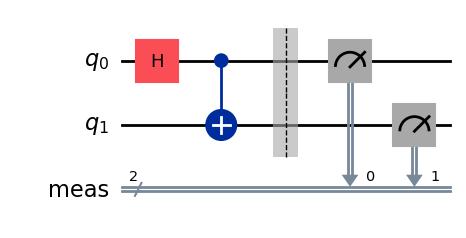

In [111]:
# Create a Bell Psi+ gate. In the Z basis, this is |00> + |11> unnormalized.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all() # Creates a classical register with default name 'meas'
qc.draw("mpl")

#### 0.3.3a: Making the circuit compatible with our machines using the Runtime

When executing circuits on a real device, we must mind that each device may natively support a different set of gates. We use a __pass manager__ to transpile the gate to a compatible form, called the __Instruction Set Architecture (ISA) circuit__.
* Our machines currently support the $X$, $RZ$, and $\sqrt{X}$ single-qubit gates, the $CZ$ two-qubit gate, and two newer gates.
    * The new gates are the fractional gates $RX$ and $RZZ$ gates. $RZZ$ performs a parallel $Z$ on two qubits.
* Familiar gates you are first introduced such as the $CX$, $H$, and $Y$ gates are expressed in terms of the native gates.
* The now-compatible equivalent gate consists of only three $\sqrt{X}$ gates surrounded on both sides by $RZ(\pi/2)$ (equlvalent to the $S$ gate but with a global phase of $e^{-i\pi/4}$) gates or $RZ(\pi)$ gates (equivalent to the $Z$ gate but with a global phase of $e^{i\pi/2} = i$), and a single $CZ$ gate in the middle.
* The circuit is equivalent, but however differ by a global phase of $3\pi/4$ from the original.

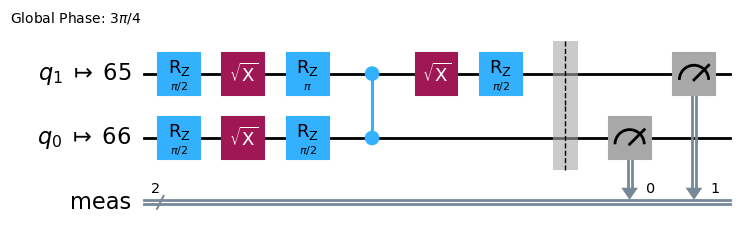

In [112]:
backend = service.least_busy(simulator=False, operational=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl")

#### 0.3.3b: Introducing the new gates.

We can enable the use of the new fractional gates on Heron machines and newer. The Torino machines, available in the free tier, uses the Heron GPU, and thus support fractional gates. This is not the case for Brisbane and Sherbrooke.

* The $\sqrt{X}$ and $RZ(\pi)$ gate in sequence on the first (bottom) qubit is replaced with a single $RX(-\pi/2)$ gate.

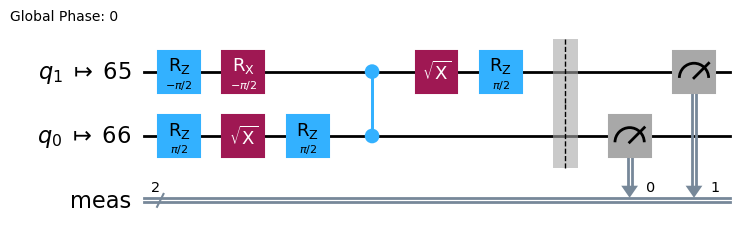

In [113]:
backend = service.backend('ibm_torino', use_fractional_gates=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl")

#### 0.3.4: Easy mode - Using the Simulator

From Section 0.3.1, we authenticated to the cloud to gain access to real quantum computing hardware. At that point, we only learned how to transpile the circuits into a form that is natively compatible with the real hardware. Unfortunately, running on real hardware can be time consuming not because of the performance of the hardware, but because of the queue of jobs.

We will use the `qiskit_aer` package to use our most famous simulator, the Aer Simulator.

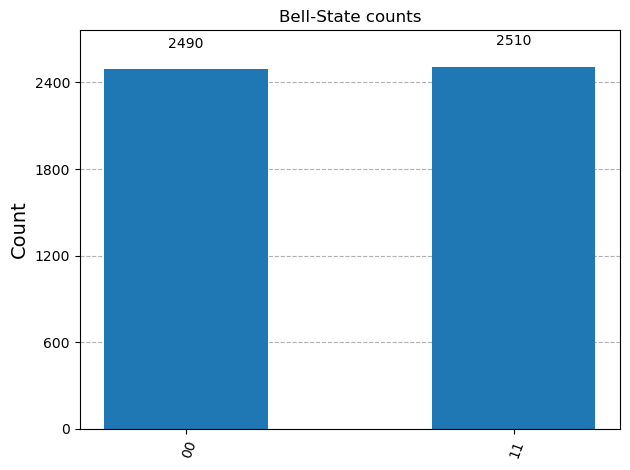

In [137]:
# Use the Aer Simulator as our easy backend.
simulator = AerSimulator()

# Transpile the circuit
aer_circuit = transpile(qc, simulator)
aer_circuit.draw("mpl")

# Run the circuit, easy mode
job = simulator.run(aer_circuit, shots=5000)
job_result = job.result()
counts = job_result.get_counts(aer_circuit)
plot_histogram(counts, title='Bell-State counts')

#### 0.3.5a: Running the circuit, using the Estimator

The runtime allows you to execute a quantum circuit using the __quantum primitives__. We will explore the first type of primitive, the __Estimator__.

Using the __Estimator__ estimates the expectation of the observable. The estimator is based on observing the quantum circuit in one of the Pauli basis, namely that of $I$, $X$, $Y$, and $Z$ in parallel.

In [143]:
# Construct an Estimator using the existing backend (the Torino machine with fractional gates enabled)
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

# Declare observables
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
print(mapped_observables)
print(f"Length of Pauli string of mapped observable: {len(mapped_observables[0].paulis[0])} {mapped_observables[0].paulis[0]}")
 
# Run job
job = estimator.run([(isa_circuit, mapped_observables)])
print(f">>> Job ID: {job.job_id()}")

[SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

After a job is submitted, you can use the `job_id` to retrieve the data at a later time, or you can wait until the job is completed with your current Python instance. Once the job is finished, we can prepare our presentation.

The value of an expectation is a _signed_ quantity in the range $[-1, 1]$, inclusive. In the Bell state circuit:
* You are equally likely to measure a $\left|0\right\rangle$ as well as a $\left|1\right\rangle$ on individual qubits. This corresponds to the $ZI$ and $IZ$ observables.
* You are equally likely to measure a $\left|+\right\rangle$ as well as a $\left|-\right\rangle$ on individual qubits. This corresponds to the $XI$ and $IX$ observables.
* An outcome of $\left|0\right\rangle$ or $\left|+\right\rangle$ affects the expectation positively, likewise $\left|1\right\rangle$ and $\left|-\right\rangle$ affects the expectation negatively. This is because what we see is actually the _eigenvalue_.
* However, we are very likely to see a $+1$ for both the $X$ and the $Z$ basis, because individual results are multipled.
    * In the $\left|\Psi\right\rangle$ state, the states of the two qubits should always be the same.
    * When translated into eigenvalues, the observable for $ZZ$ and $XX$ are the product of the eigenvalues corresponding to the individual qubit outcomes.
    * Because we see either both positive or both negative, they multiply to be always positive!

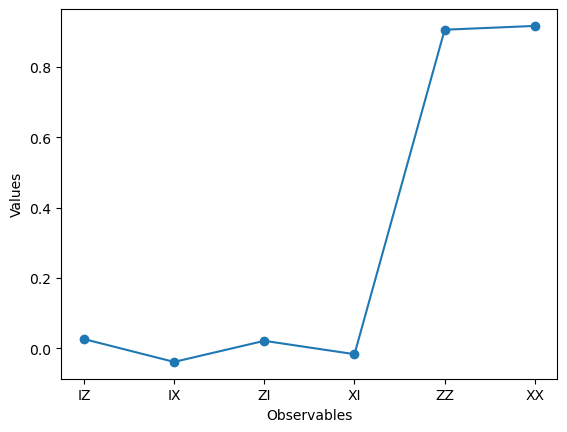

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'shots': 5024, 'target_precision': 0.01414213562373095, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': False, 'enable_measure': True, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': True, 'zne_mitigation': False, 'pec_mitigation': False}, 'version': 2})

In [145]:
# Obtain job result
job_result = job.result()
pub_result = job.result()[0]

# Plot the result
from matplotlib import pyplot as plt
values = pub_result.data.evs
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()
job_result


#### 0.3.5b: Running the circuit, using the Simulator

We will explore the other quantum primitive, the __Sampler__. We have already ran a Sampler using the Aer simulator; this time we will use a real device (in hard mode) or another simulator (in easy mode).

Using the __Sampler__ causes the backend device or simulator to repeatedly measure the quantum circuit results. Each measurement is called a shot. By default. 1024 shots will be made.

In [141]:
# Construct an Estimator using the existing backend (the Torino machine with fractional gates enabled)
sampler = Sampler(mode=backend)
simulator.options.default_shots = 5000
 
# Run job
job = sampler.run([(isa_circuit)])
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d0kqo99p0ric73avo7rg


We extract the job in the same way as the Estimator, except with Simulator-specific specialties. Due to the potential errors accumulated, we may occasionally see a measurement landing in the $\left|01\right\rangle$ or $\left|10\right\rangle$ state, which shouldn't in the maximally entangled $\left|\Psi\right\rangle$ state.

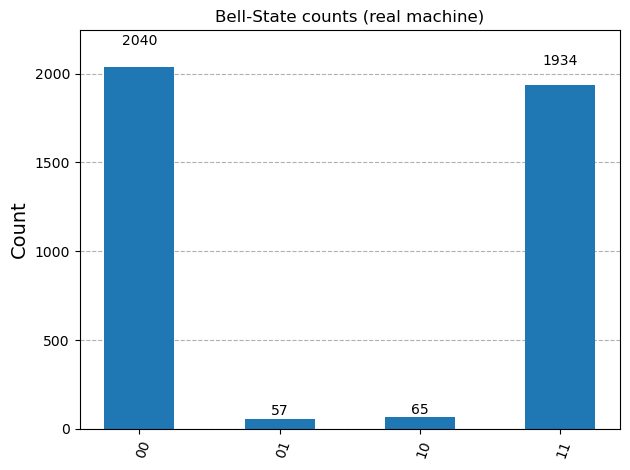

In [142]:
# Obtain job result
job_result = job.result()
pub_result = job.result()[0]

counts = pub_result.data.meas.get_counts()
plot_histogram(counts, title='Bell-State counts (real machine)')

Congratulations for finishing the Hello World section of this introductory chapter! IBM also provides you with a __fake backend__, allowing you to skip the queue and simulate the actual quantum machine without using the Aer simulator. Please note that simulators are not feasible for 100-qubit circuits.

## Chapter 1: Your basic quantum algorithm (TBD)

Your first chapter will introduce you to only basic quantum algorithms, without any reference to its classical counterpart. We will explore the Deutsch-Josza algorithm, superdense coding, and quantum teleportation.

## Chapter 2: Searching the pile (TBD)

Your second chapter will introduce you to the Grover Search. John Doe needs to use the Grover Search to find the key that will provide him with a QAOA tool for his definitive problem.

## Chapter 3: Choosing the routes (TBD)

Your third chapter will introduce you to QAOA and Hamiltonian energy optimization. The tools for this algorithm will provide John the best route to reallocate the various neighborhoods in this beleaguered county.